In [1]:
import pandas as pd 
import random as rd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
import math

In [2]:
df_kendaraan_train = pd.read_csv('kendaraan_train.csv')
df_kendaraan_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [3]:
df_kendaraan_test = pd.read_csv('kendaraan_test.csv')
df_kendaraan_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


# Analisis Data dan Preprocessing Data

**Check Shape Dari Data**

In [4]:
df_kendaraan_train.shape

(285831, 12)

In [5]:
df_kendaraan_test.shape

(47639, 11)

**Check nilai missing value**

In [6]:
df_kendaraan_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [7]:
df_kendaraan_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

**Check Info dari Dataset**

In [8]:
df_kendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [9]:
df_kendaraan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


**Duplicate Value**

In [10]:
df_kendaraan_train.duplicated().sum()

0

In [11]:
df_kendaraan_test.duplicated().sum()

3

**Impute Missing Value**

In [12]:
df_kendaraan_train['Jenis_Kelamin'].fillna(df_kendaraan_train['Jenis_Kelamin'].mode().iloc[0], inplace=True)
df_kendaraan_train['Umur_Kendaraan'].fillna(df_kendaraan_train['Umur_Kendaraan'].mode().iloc[0], inplace=True)
df_kendaraan_train['Kendaraan_Rusak'].fillna(df_kendaraan_train['Kendaraan_Rusak'].mode().iloc[0], inplace=True)

In [13]:
df_kendaraan_train['Umur'].fillna(df_kendaraan_train['Umur'].mean(), inplace=True)
df_kendaraan_train['SIM'].fillna(df_kendaraan_train['SIM'].mean(), inplace=True)
df_kendaraan_train['Kode_Daerah'].fillna(df_kendaraan_train['Kode_Daerah'].mean(), inplace=True)
df_kendaraan_train['Sudah_Asuransi'].fillna(df_kendaraan_train['Sudah_Asuransi'].mean(), inplace=True)
df_kendaraan_train['Premi'].fillna(df_kendaraan_train['Premi'].mean(), inplace=True)
df_kendaraan_train['Kanal_Penjualan'].fillna(df_kendaraan_train['Kanal_Penjualan'].mean(), inplace=True)
df_kendaraan_train['Lama_Berlangganan'].fillna(df_kendaraan_train['Lama_Berlangganan'].mean(), inplace=True)

In [14]:
df_kendaraan_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

**Handling Duplicate Value**

In [15]:
df_kendaraan_train.drop_duplicates(keep=False,inplace=True)
df_kendaraan_test.drop_duplicates(keep=False,inplace=True)

In [16]:
df_kendaraan_test.duplicated().sum()

0

In [17]:
df_kendaraan_train.duplicated().sum()

0

# CLUSTERING

**Seleksi Atribut Yang Dibutuhkan**

** Untuk Kegiatan Clustering Saya Akan Memilih Cluster Antara Umur dan Ketertarikan Membeli

In [18]:
df_train_cluster = df_kendaraan_train[['Umur','Tertarik']]
df_test_cluster = df_kendaraan_test[['Umur','Tertarik']]

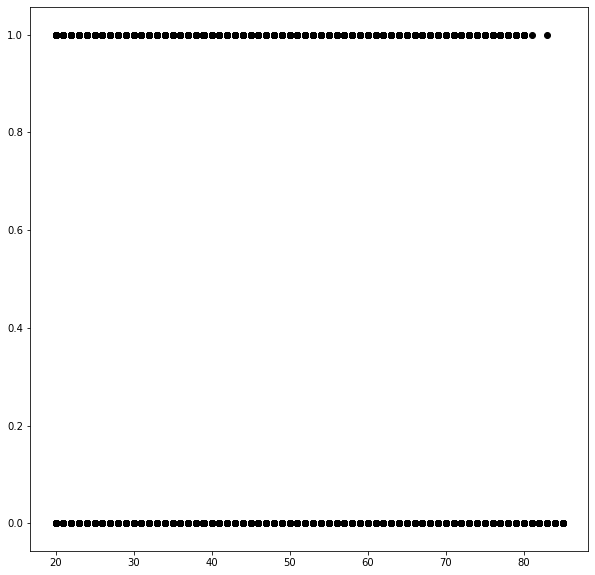

In [19]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x=df_train_cluster['Umur'],y=df_train_cluster['Tertarik'], color="black")
plt.show()

** Pilih Random Banyaknya Centroids

In [20]:
K = 3

** Check Nilai Max Tiap Kolom 

In [21]:
maxUmur_train = max(df_train_cluster['Umur'])
minUmur_train = min(df_train_cluster['Umur'])
maxUmur_test = max(df_test_cluster['Umur'])
minUmur_test = min(df_test_cluster['Umur'])

In [22]:
maxTertarik_train = max(df_train_cluster['Tertarik'])
minTertarik_train = min(df_train_cluster['Tertarik'])
maxTertarik_test = max(df_test_cluster['Tertarik'])
minTertarik_test = min(df_test_cluster['Tertarik'])

** Buat List Centroids

In [23]:
LX_train = []
LY_train = []
LXY_train = []
LX_test = []
LY_test = []
LXY_test = []

In [24]:
for i in range(K):
    xrand_train = rd.randint(minUmur_train,maxUmur_train)
    yrand_train = rd.randint(minTertarik_train, maxTertarik_train)
    xrand_test = rd.randint(minUmur_test,maxUmur_test)
    yrand_test = rd.randint(minTertarik_test, maxTertarik_test)
    LX_train.append(xrand_train)
    LX_test.append(xrand_test)
    LY_train.append(yrand_train)
    LY_test.append(yrand_test)
LXY_train.append(LX_train)
LXY_train.append(LY_train)
LXY_test.append(LX_test)
LXY_test.append(LY_test)

In [25]:
print(LXY_train)

[[59, 37, 37], [0, 1, 0]]


In [26]:
print(LXY_test)

[[61, 22, 71], [1, 0, 0]]


** Visualisasikan Centroids

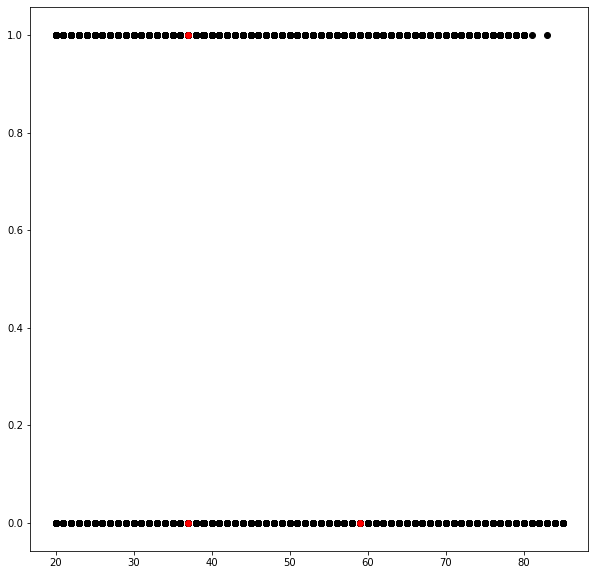

In [27]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df_train_cluster['Umur'],df_train_cluster['Tertarik'], color="black")
plt.scatter(LXY_train[0],LXY_train[1], color="red")
plt.show()

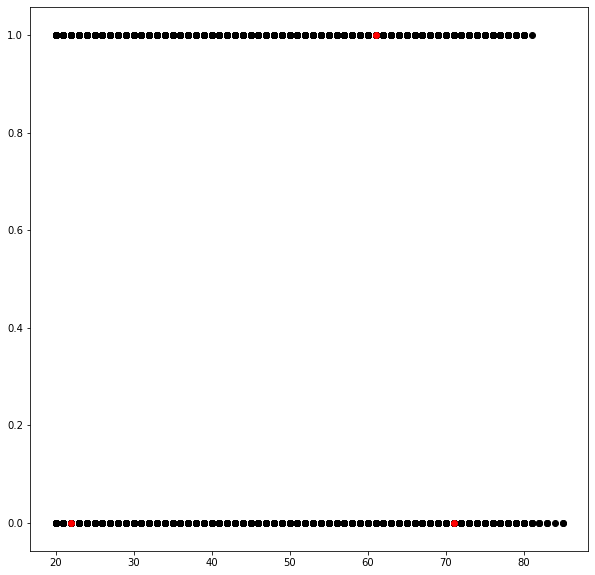

In [28]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df_test_cluster['Umur'],df_test_cluster['Tertarik'], color="black")
plt.scatter(LXY_test[0],LXY_test[1], color="red")
plt.show()

** Buat Array Kosong Untuk Menampung Cluster 

In [29]:
clust_1_train = []
clust_2_train = []
clust_3_train = []
clust_1_test = []
clust_2_test = []
clust_3_test = []

In [30]:
panjangTrainData = len(df_train_cluster.to_numpy())
panjangTestData = len(df_test_cluster.to_numpy())

In [31]:
df_train_cluster = df_train_cluster.astype(float)
df_test_cluster = df_test_cluster.astype(float)

**Hitung Jarak Antar Cluster dan Centroids**

** Hitung Dengan Menggunakan Perhitungan Jarak Euclidean 

In [32]:
for i in range(panjangTrainData):
    formula_1 = math.sqrt((df_train_cluster['Umur'][i]-LXY_train[0][0])**2+(df_train_cluster['Tertarik'][i]-LXY_train[1][0])**2)
    formula_2 = math.sqrt((df_train_cluster['Umur'][i]-LXY_train[0][1])**2+(df_train_cluster['Tertarik'][i]-LXY_train[1][1])**2)
    formula_3 = math.sqrt((df_train_cluster['Umur'][i]-LXY_train[0][2])**2+(df_train_cluster['Tertarik'][i]-LXY_train[1][2])**2)
    clust_1_train.append(formula_1)
    clust_2_train.append(formula_2)
    clust_3_train.append(formula_3)

In [33]:
for j in range(panjangTestData):
    formula_1 = math.sqrt((df_test_cluster['Umur'].iloc[j]-LXY_test[0][0])**2+(df_test_cluster['Tertarik'].iloc[j]-LXY_test[1][0])**2)
    formula_2 = math.sqrt((df_test_cluster['Umur'].iloc[j]-LXY_test[0][1])**2+(df_test_cluster['Tertarik'].iloc[j]-LXY_test[1][1])**2)
    formula_3 = math.sqrt((df_test_cluster['Umur'].iloc[j]-LXY_test[0][2])**2+(df_test_cluster['Tertarik'].iloc[j]-LXY_test[1][2])**2)
    clust_1_test.append(formula_1)
    clust_2_test.append(formula_2)
    clust_3_test.append(formula_3)

**Clusterisasi Dekat Dengan Cluster Berapa**

In [34]:
final_cluster = []
c1_cluster = []
c2_cluster = []
c3_cluster = []

In [35]:
for i in range(panjangTrainData):
    if clust_1_train[i] > clust_2_train[i] and clust_1_train[i] > clust_3_train[i]:
        final_cluster.append(1)
        c1_cluster.append(i)
    elif clust_2_train[i] > clust_1_train[i] and clust_2_train[i] > clust_3_train[i]:
        final_cluster.append(2)
        c2_cluster.append(i)
    elif clust_3_train[i] > clust_1_train[i] and clust_3_train[i] > clust_2_train[i]:
        final_cluster.append(3)
        c3_cluster.append(i)

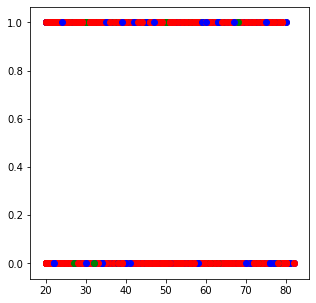

In [36]:
fig = plt.figure(figsize=(5,5))
#loop = len(final_cluster)
loop = 30000
for i in range(loop):
    if final_cluster[i] == 1 :
        plt.scatter(df_train_cluster['Umur'].iloc[i], df_train_cluster['Tertarik'].iloc[i], color = 'red')
    elif final_cluster[i] == 2 :
        plt.scatter(df_train_cluster['Umur'].iloc[i], df_train_cluster['Tertarik'].iloc[i], color = 'blue')
    else:
        plt.scatter(df_train_cluster['Umur'].iloc[i], df_train_cluster['Tertarik'].iloc[i], color = 'green')
plt.show()

In [37]:
def meanCentroids(listCluster, datasetFile):
    itx = 0
    ity = 0
    updatec = []
    for i in range(len(listCluster)):
        index = int(listCluster[i])
        itx = itx + datasetFile.iloc[listCluster[i], 0]
        ity = ity + datasetFile.iloc[listCluster[i], 1]
    if itx == 0  or ity == 0:
        updatec.append(0)
        updatec.append(0)
    else : 
        sumx = itx/len(listCluster)
        sumy = ity/len(listCluster)
        updatec.append(sumx)
        updatec.append(sumy)
    return updatec

**CLUSTER KE N**

In [39]:
old_LXY_train = []
old_LXY_train.append([])
old_LXY_train.append([])
iterasi = 0

while True: 
    if old_LXY_train[0] == LXY_train[0] and old_LXY_train[1] == LXY_train[1] :
        print(iterasi)
        print(LXY_train)
        print(LXY_train_baru)
        break
    else :
        newLX = []
        newLY =[]
        new_final_cluster = []
        new_c1_cluster = []
        new_c2_cluster = []
        new_c3_cluster = []
        new_clust_1_train = []
        new_clust_2_train = []
        new_clust_3_train = []   

        centroids1_baru = meanCentroids(clust_1_train, df_train_cluster)
        centroids2_baru = meanCentroids(clust_2_train, df_train_cluster)
        centroids3_baru = meanCentroids(clust_3_train, df_train_cluster)
        newLX.append(centroids1_baru[0])
        newLX.append(centroids2_baru[0])
        newLX.append(centroids3_baru[0])
        newLY.append(centroids1_baru[1])
        newLY.append(centroids2_baru[1])
        newLY.append(centroids3_baru[1])
        
        if newLX == [0.0,0.0,0.0] and newLY == [0.0,0.0,0.0] :
            break
        else :
            LXY_train_baru = []
            LXY_train_baru.append(newLX)
            LXY_train_baru.append(newLY)
        
        for i in range(panjangTrainData):
            formula_1 = math.sqrt((df_train_cluster['Umur'][i]-LXY_train[0][0])**2+(df_train_cluster['Tertarik'][i]-LXY_train[1][0])**2)
            formula_2 = math.sqrt((df_train_cluster['Umur'][i]-LXY_train[0][1])**2+(df_train_cluster['Tertarik'][i]-LXY_train[1][1])**2)
            formula_3 = math.sqrt((df_train_cluster['Umur'][i]-LXY_train[0][2])**2+(df_train_cluster['Tertarik'][i]-LXY_train[1][2])**2)
            new_clust_1_train.append(formula_1)
            new_clust_2_train.append(formula_2)
            new_clust_3_train.append(formula_3)
        
        for i in range(panjangTrainData):
            if new_clust_1_train[i] > new_claust_2_train[i] and new_clust_1_train[i] > new_clust_3_train[i]:
                new_final_cluster.append(1)
                new_c1_cluster.append(i)
            elif new_clust_2_train[i] > new_clust_1_train[i] and new_clust_2_train[i] > new_clust_3_train[i]:
                new_final_cluster.append(2)
                new_c2_cluster.append(i)
            elif new_clust_3_train[i] > new_clust_1_train[i] and new_clust_3_train[i] > new_clust_2_train[i]:
                new_final_cluster.append(3)
                new_c3_cluster.append(i)
        
        old_LXY_train = LXY_train
        LXY_train = LXY_train_baru
        iterasi += 1

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_train_cluster['Umur'],df_train_cluster['Tertarik'], color="black")
plt.scatter(LXY_train[0],LXY_train[1], color="red")
plt.show()

In [ ]:
fig = plt.figure(figsize=(5,5))
#loop = len(final_cluster)
loop = 30000
for i in range(loop):
    if new_final_cluster[i] == 1 :
        plt.scatter(df_train_cluster['Umur'].iloc[i], df_train_cluster['Tertarik'].iloc[i], color = 'red')
    elif new_final_cluster[i] == 2 :
        plt.scatter(df_train_cluster['Umur'].iloc[i], df_train_cluster['Tertarik'].iloc[i], color = 'blue')
    else:
        plt.scatter(df_train_cluster['Umur'].iloc[i], df_train_cluster['Tertarik'].iloc[i], color = 'green')
plt.show()